
MODEL COMPARISON: Random Forest vs XGBoost
This notebook compares the two churn prediction models trained in:
- 03_RandomForestClassifier.py
- 04_XgBoost.py
All models use identical preprocessing, train/test splits, and CV strategies
to ensure fair comparison.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# RANDOM FOREST METRICS

rf_metrics = {
    'Accuracy': 0.8225,
    'Precision': 0.5528,
    'Recall': 0.6683,
    'F1-Score': 0.6051,
    'ROC-AUC': 0.8473
}

# Calculate F2-Score for Random Forest
rf_precision = rf_metrics['Precision']
rf_recall = rf_metrics['Recall']
rf_f2 = 5 * (rf_precision * rf_recall) / (4 * rf_precision + rf_recall) if (4 * rf_precision + rf_recall) > 0 else 0
rf_metrics['F2-Score'] = rf_f2

print("Random Forest Metrics:")
for metric, value in rf_metrics.items():
    print(f"  {metric:12s}: {value:.4f}")


# XGBOOST METRICS 

xgb_metrics = {
    'Accuracy': 0.8570,
    'Precision': 0.7553,
    'Recall': 0.4398,
    'F1-Score': 0.5559,
    'ROC-AUC': 0.8540
}

# Calculate F2-Score for XGBoost
xgb_precision = xgb_metrics['Precision']
xgb_recall = xgb_metrics['Recall']
xgb_f2 = 5 * (xgb_precision * xgb_recall) / (4 * xgb_precision + xgb_recall) if (4 * xgb_precision + xgb_recall) > 0 else 0
xgb_metrics['F2-Score'] = xgb_f2

print("\nXGBoost Metrics:")
for metric, value in xgb_metrics.items():
    print(f"  {metric:12s}: {value:.4f}")



Random Forest Metrics:
  Accuracy    : 0.8225
  Precision   : 0.5528
  Recall      : 0.6683
  F1-Score    : 0.6051
  ROC-AUC     : 0.8473
  F2-Score    : 0.6415

XGBoost Metrics:
  Accuracy    : 0.8570
  Precision   : 0.7553
  Recall      : 0.4398
  F1-Score    : 0.5559
  ROC-AUC     : 0.8540
  F2-Score    : 0.4799


### Create Comparison DataFrame

In [3]:
# Create comparison table
comparison_df = pd.DataFrame({
    'Random Forest': list(rf_metrics.values()),
    'XGBoost': list(xgb_metrics.values())
}, index=list(rf_metrics.keys()))

# Add difference column
comparison_df['Difference (XGB - RF)'] = comparison_df['XGBoost'] - comparison_df['Random Forest']

# Add winner column
comparison_df['Winner'] = comparison_df['Difference (XGB - RF)'].apply(
    lambda x: 'XGBoost' if x > 0 else ('Random Forest' if x < 0 else 'Tie')
)

 
print("COMPLETE MODEL COMPARISON")
  
print(comparison_df.round(4))
  



COMPLETE MODEL COMPARISON
           Random Forest  XGBoost  Difference (XGB - RF)         Winner
Accuracy          0.8225   0.8570                 0.0345        XGBoost
Precision         0.5528   0.7553                 0.2025        XGBoost
Recall            0.6683   0.4398                -0.2285  Random Forest
F1-Score          0.6051   0.5559                -0.0492  Random Forest
ROC-AUC           0.8473   0.8540                 0.0067        XGBoost
F2-Score          0.6415   0.4799                -0.1616  Random Forest


### Visualization 1: Side-by-Side Bar Chart

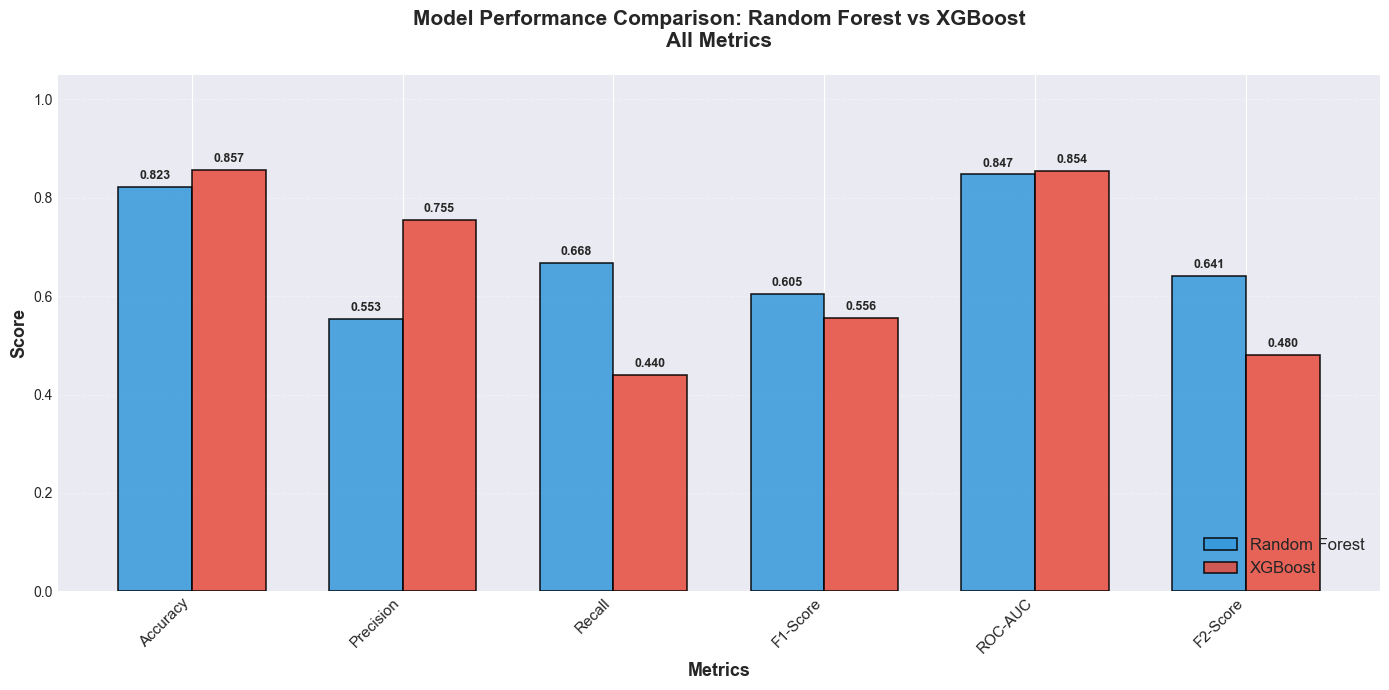

In [4]:
fig, ax = plt.subplots(figsize=(14, 7))

metrics_names = list(rf_metrics.keys())
x = np.arange(len(metrics_names))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['Random Forest'], width, 
               label='Random Forest', color='#3498DB', alpha=0.85, edgecolor='black', linewidth=1.2)
bars2 = ax.bar(x + width/2, comparison_df['XGBoost'], width, 
               label='XGBoost', color='#E74C3C', alpha=0.85, edgecolor='black', linewidth=1.2)

ax.set_xlabel('Metrics', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Model Performance Comparison: Random Forest vs XGBoost\nAll Metrics', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics_names, rotation=45, ha='right', fontsize=11)
ax.legend(fontsize=12, loc='lower right')
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
ax.set_ylim([0, 1.05])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

### Visualization 2: Performance Difference Plot

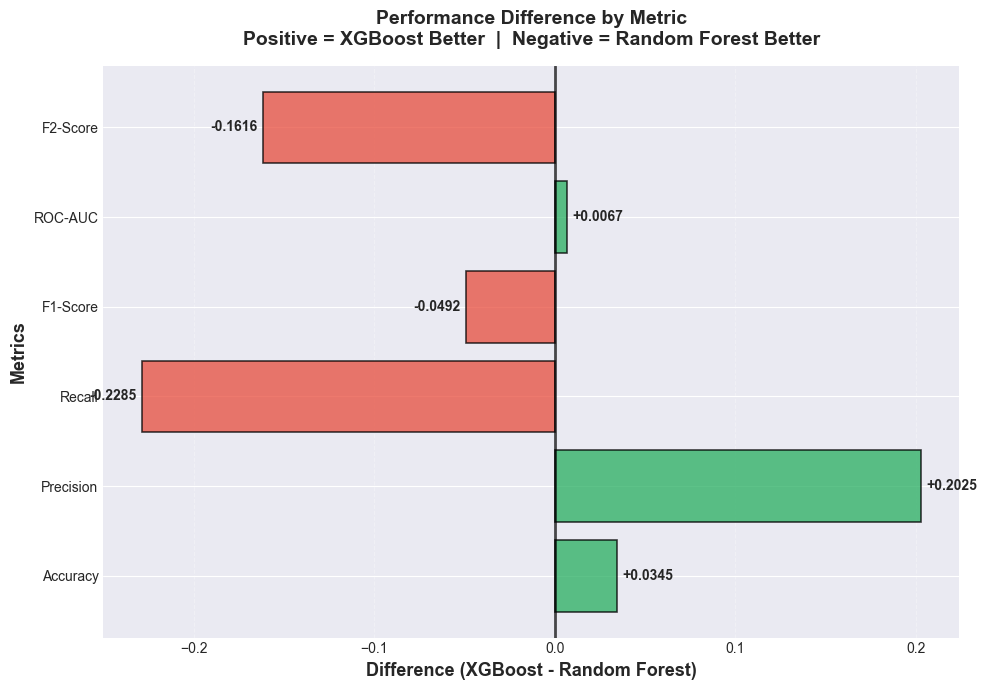

In [5]:
fig, ax = plt.subplots(figsize=(10, 7))

colors = ['#27AE60' if x > 0 else '#E74C3C' if x < 0 else '#95A5A6' 
          for x in comparison_df['Difference (XGB - RF)']]
bars = ax.barh(metrics_names, comparison_df['Difference (XGB - RF)'], 
               color=colors, alpha=0.75, edgecolor='black', linewidth=1.2)

ax.axvline(x=0, color='black', linewidth=2, linestyle='-', alpha=0.7)
ax.set_xlabel('Difference (XGBoost - Random Forest)', fontsize=13, fontweight='bold')
ax.set_ylabel('Metrics', fontsize=13, fontweight='bold')
ax.set_title('Performance Difference by Metric\nPositive = XGBoost Better  |  Negative = Random Forest Better', 
             fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.3, axis='x', linestyle='--')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, comparison_df['Difference (XGB - RF)'])):
    label_x = val + (0.003 if val > 0 else -0.003)
    ha = 'left' if val > 0 else 'right'
    ax.text(label_x, i, f'{val:+.4f}', va='center', ha=ha, 
            fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### Visualization 3: Radar Chart (Spider Plot)

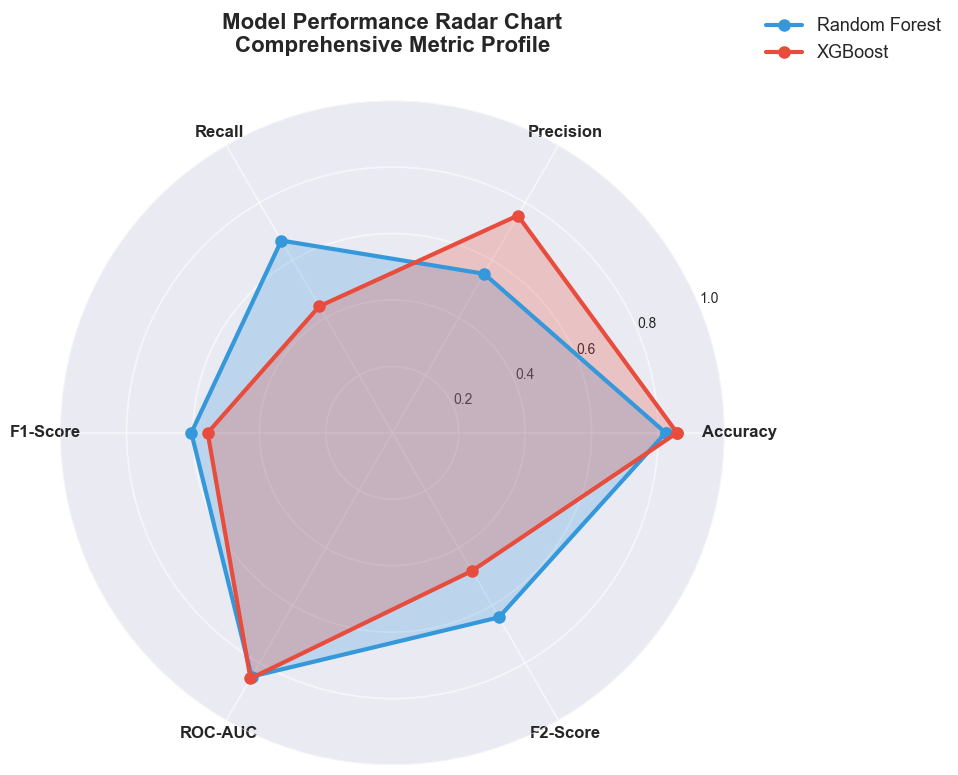

In [6]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Number of metrics
num_vars = len(metrics_names)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Plot Random Forest
rf_values = comparison_df['Random Forest'].tolist()
rf_values += rf_values[:1]
ax.plot(angles, rf_values, 'o-', linewidth=3, label='Random Forest', 
        color='#3498DB', markersize=8)
ax.fill(angles, rf_values, alpha=0.25, color='#3498DB')

# Plot XGBoost
xgb_values = comparison_df['XGBoost'].tolist()
xgb_values += xgb_values[:1]
ax.plot(angles, xgb_values, 'o-', linewidth=3, label='XGBoost', 
        color='#E74C3C', markersize=8)
ax.fill(angles, xgb_values, alpha=0.25, color='#E74C3C')

# Customize
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_names, size=12, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], size=10)
ax.set_title('Model Performance Radar Chart\nComprehensive Metric Profile', 
             size=16, fontweight='bold', pad=35)
ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.15), fontsize=13, framealpha=0.9)
ax.grid(True, linewidth=1.2, alpha=0.6)

plt.tight_layout()
plt.show()

### Visualization 4: Critical Churn Metrics (Business Priority)


C:\Users\FORAM\AppData\Local\Temp\ipykernel_28600\1291015064.py:37: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\FORAM\OneDrive\Desktop\ML_McMaster\ML_Term_Project\bankingenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


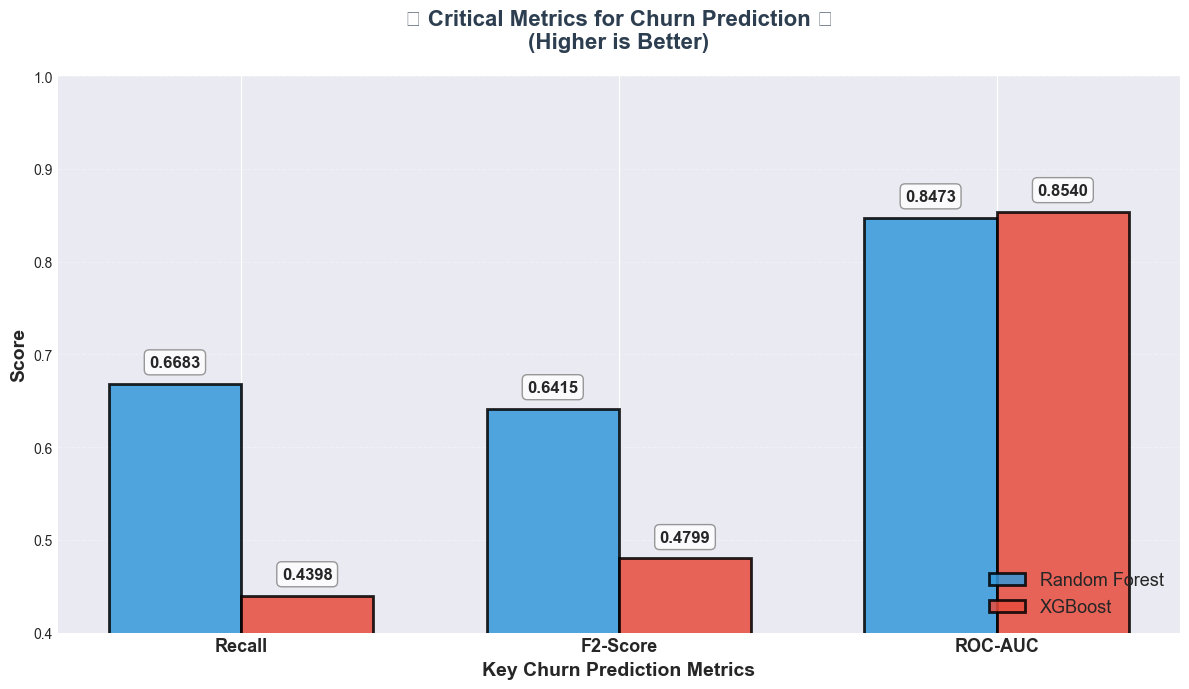

In [7]:
# Focus on the most important metrics for churn prediction
churn_metrics = ['Recall', 'F2-Score', 'ROC-AUC']
churn_comparison = comparison_df.loc[churn_metrics]

fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(churn_metrics))
width = 0.35

bars1 = ax.bar(x - width/2, churn_comparison['Random Forest'], width, 
               label='Random Forest', color='#3498DB', alpha=0.85, 
               edgecolor='black', linewidth=2)
bars2 = ax.bar(x + width/2, churn_comparison['XGBoost'], width, 
               label='XGBoost', color='#E74C3C', alpha=0.85, 
               edgecolor='black', linewidth=2)

ax.set_xlabel('Key Churn Prediction Metrics', fontsize=14, fontweight='bold')
ax.set_ylabel('Score', fontsize=14, fontweight='bold')
ax.set_title('⭐ Critical Metrics for Churn Prediction ⭐\n(Higher is Better)', 
             fontsize=16, fontweight='bold', pad=20, color='#2C3E50')
ax.set_xticks(x)
ax.set_xticklabels(churn_metrics, fontsize=13, fontweight='bold')
ax.legend(fontsize=13, loc='lower right', framealpha=0.95)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')
ax.set_ylim([0.4, 1.0])

# Add value labels with better visibility
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.015,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                         edgecolor='gray', alpha=0.8))

plt.tight_layout()
plt.show()

### Visualization 5: Performance Heatmap

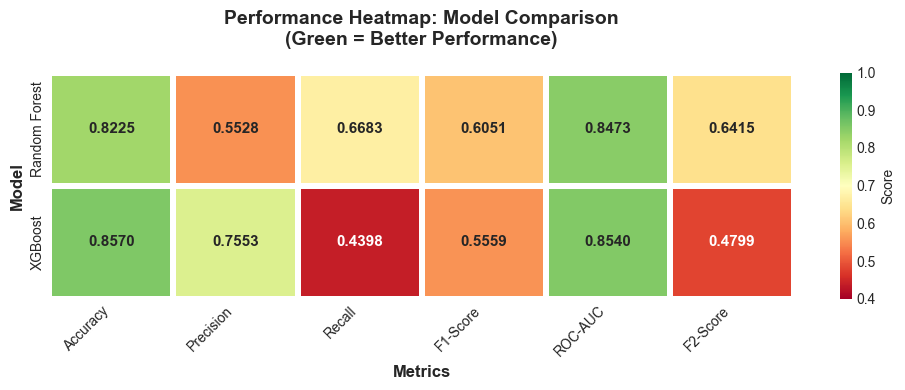

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))

# Prepare data for heatmap
heatmap_data = comparison_df[['Random Forest', 'XGBoost']].T

sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='RdYlGn', 
            center=0.7, vmin=0.4, vmax=1.0, 
            linewidths=3, linecolor='white',
            cbar_kws={'label': 'Score'}, ax=ax,
            annot_kws={'fontsize': 11, 'fontweight': 'bold'})

ax.set_title('Performance Heatmap: Model Comparison\n(Green = Better Performance)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
ax.set_ylabel('Model', fontsize=12, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()



### Visualization 6: Metric-by-Metric Winner Chart

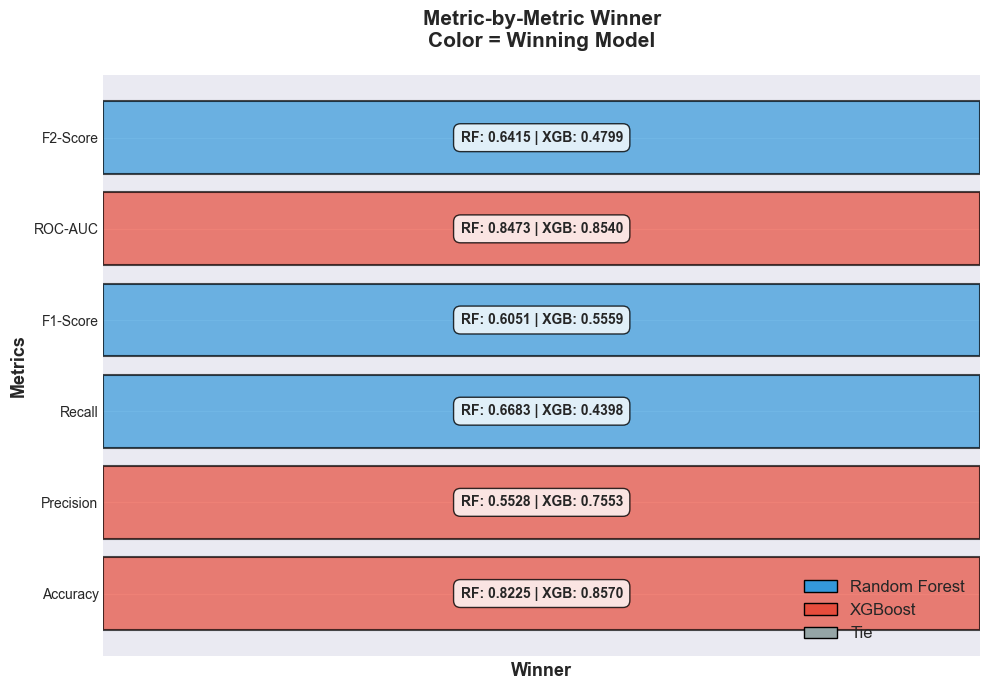

In [9]:
fig, ax = plt.subplots(figsize=(10, 7))

# Create winner data
winner_counts = comparison_df['Winner'].value_counts()
winner_data = []
colors_map = {'Random Forest': '#3498DB', 'XGBoost': '#E74C3C', 'Tie': '#95A5A6'}

for metric in metrics_names:
    winner = comparison_df.loc[metric, 'Winner']
    rf_val = comparison_df.loc[metric, 'Random Forest']
    xgb_val = comparison_df.loc[metric, 'XGBoost']
    winner_data.append({
        'Metric': metric,
        'Winner': winner,
        'RF_Value': rf_val,
        'XGB_Value': xgb_val,
        'Color': colors_map[winner]
    })

winner_df = pd.DataFrame(winner_data)

# Plot
bars = ax.barh(winner_df['Metric'], [1]*len(winner_df), 
               color=winner_df['Color'], alpha=0.7, edgecolor='black', linewidth=1.5)

ax.set_xlabel('Winner', fontsize=13, fontweight='bold')
ax.set_ylabel('Metrics', fontsize=13, fontweight='bold')
ax.set_title('Metric-by-Metric Winner\nColor = Winning Model', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xlim([0, 1])
ax.set_xticks([])

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#3498DB', edgecolor='black', label='Random Forest'),
    Patch(facecolor='#E74C3C', edgecolor='black', label='XGBoost'),
    Patch(facecolor='#95A5A6', edgecolor='black', label='Tie')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=12)

# Add values as text
for i, row in winner_df.iterrows():
    ax.text(0.5, i, f"RF: {row['RF_Value']:.4f} | XGB: {row['XGB_Value']:.4f}", 
            va='center', ha='center', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()



### Final Model Selection & Recommendation

In [ ]:
 
print("FINAL MODEL SELECTION FOR CHURN PREDICTION")
  

# Determining overall winner based on F2-Score (most important for churn)
rf_f2_score = rf_metrics['F2-Score']
xgb_f2_score = xgb_metrics['F2-Score']

if xgb_f2_score > rf_f2_score:
    winner = "XGBoost"
    winner_metrics = xgb_metrics
    loser = "Random Forest"
    loser_metrics = rf_metrics
    margin = xgb_f2_score - rf_f2_score
else:
    winner = "Random Forest"
    winner_metrics = rf_metrics
    loser = "XGBoost"
    loser_metrics = xgb_metrics
    margin = rf_f2_score - xgb_f2_score

print(f"\nWINNER: {winner}")
print(f"F2-Score:  {winner_metrics['F2-Score']:.4f}")
print(f"Recall:    {winner_metrics['Recall']:.4f}")
print(f"Precision: {winner_metrics['Precision']:.4f}")
print(f"ROC-AUC:   {winner_metrics['ROC-AUC']:.4f}")

print(f"\nRunner-up: {loser}")
print(f"F2-Score:  {loser_metrics['F2-Score']:.4f}")
print(f"recall:    {loser_metrics['Recall']:.4f}")
print(f"Precision: {loser_metrics['Precision']:.4f}")
print(f"ROC-AUC:   {loser_metrics['ROC-AUC']:.4f}")

print(f"\nPerformance Margin: {margin:.4f} (F2-Score difference)")

# Win count
rf_wins = (comparison_df['Winner'] == 'Random Forest').sum()
xgb_wins = (comparison_df['Winner'] == 'XGBoost').sum()
ties = (comparison_df['Winner'] == 'Tie').sum()

print(f"\nMetric-by-Metric Summary:")
print(f"Random Forest wins: {rf_wins}/{len(metrics_names)}")
print(f"XGBoost wins:       {xgb_wins}/{len(metrics_names)}")
print(f"Ties:               {ties}/{len(metrics_names)}")

print(f"\nWhy F2-Score is the deciding factor:")
print(f"Churn prediction prioritizes RECALL (catching potential churners)")
print(f"Missing a churner is more costly than a false alarm")
print(f"F2-Score weights recall 2times more than precision")
print(f"Best metric for business value in churn scenarios")

print(f"\nBusiness Recommendation:")
print(f"    Deploy {winner} for production churn prediction")
print(f"    Expected to catch {winner_metrics['Recall']*100:.1f}% of churners")
print(f"    {winner_metrics['Precision']*100:.1f}% precision (minimize false alarms)")
print(f"    ROC-AUC of {winner_metrics['ROC-AUC']:.4f} shows strong overall discrimination")

  


# Export comparison results
comparison_export = comparison_df.copy()
comparison_export.to_csv("../data/processed/model_comparison_results.csv")
print("\nComparison results saved to: ../data/processed/model_comparison_results.csv")



FINAL MODEL SELECTION FOR CHURN PREDICTION

WINNER: Random Forest
F2-Score:  0.6415
Recall:    0.6683
Precision: 0.5528
ROC-AUC:   0.8473

Runner-up: XGBoost
F2-Score:  0.4799
recall:    0.4398
Precision: 0.7553
ROC-AUC:   0.8540

Performance Margin: 0.1616 (F2-Score difference)

Metric-by-Metric Summary:
Random Forest wins: 3/6
XGBoost wins:       3/6
Ties:               0/6

Why F2-Score is the deciding factor:
Churn prediction prioritizes RECALL (catching potential churners)
Missing a churner is more costly than a false alarm
F2-Score weights recall 2times more than precision
Best metric for business value in churn scenarios

Business Recommendation:
    Deploy Random Forest for production churn prediction
    Expected to catch 66.8% of churners
    55.3% precision (minimize false alarms)
    ROC-AUC of 0.8473 shows strong overall discrimination

Comparison results saved to: ../data/processed/model_comparison_results.csv


In [11]:
# Summary statistics
 
print("STATISTICAL SUMMARY")
  

summary_stats = pd.DataFrame({
    'Metric': metrics_names,
    'Random Forest': comparison_df['Random Forest'].values,
    'XGBoost': comparison_df['XGBoost'].values,
    'Absolute Difference': np.abs(comparison_df['Difference (XGB - RF)'].values),
    'Percent Difference (%)': (comparison_df['Difference (XGB - RF)'] / comparison_df['Random Forest'] * 100).values,
    'Winner': comparison_df['Winner'].values
})

print(summary_stats.to_string(index=False))
  

print(f"\nAverage Performance:")
print(f"  Random Forest: {comparison_df['Random Forest'].mean():.4f}")
print(f"  XGBoost:       {comparison_df['XGBoost'].mean():.4f}")
print(f"  Difference:    {(comparison_df['XGBoost'].mean() - comparison_df['Random Forest'].mean()):.4f}")

STATISTICAL SUMMARY
   Metric  Random Forest  XGBoost  Absolute Difference  Percent Difference (%)        Winner
 Accuracy       0.822500 0.857000             0.034500                4.194529       XGBoost
Precision       0.552800 0.755300             0.202500               36.631693       XGBoost
   Recall       0.668300 0.439800             0.228500              -34.191231 Random Forest
 F1-Score       0.605100 0.555900             0.049200               -8.130887 Random Forest
  ROC-AUC       0.847300 0.854000             0.006700                0.790747       XGBoost
 F2-Score       0.641494 0.479892             0.161602              -25.191543 Random Forest

Average Performance:
  Random Forest: 0.6896
  XGBoost:       0.6570
  Difference:    -0.0326
